<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/Lecture_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to build VGG16 CNN classifier for the CIFAR-10 dataset
Created by James Green, Oct 2019
- Notebook follows tutorial at https://www.pyimagesearch.com/2018/10/08/keras-vs-tensorflow-which-one-is-better-and-which-one-should-i-learn/
- VGG16 developed by the VGG (Visual Geometry Group, University of Oxford) for the ILSVRC-2014 competition. 
    - Published at: https://arxiv.org/abs/1409.1556 
    - Note that VGG16 is available (pre-trained) through Keras.applications
```python
        from keras.applications import VGG16
        VGG16.summary() # Print a summary of the network structure
```
    - VGGNet-like architectures are characterized by: 
        1. Using only 3×3 convolutional layers stacked on top of each other in increasing depth
        2. Reducing volume size by max pooling
        3. Fully-connected layers at the end of the network prior to a softmax classifier
        *(from https://www.pyimagesearch.com/2018/04/16/keras-and-convolutional-neural-networks-cnns/)*
- The CIFAR-10 image dataset published at: https://www.cs.toronto.edu/~kriz/cifar.html

In [0]:
# import the necessary packages
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

# Define a "MiniVGGNetKeras" class that will build the VGG deep net when build() is invoked

In [0]:
# Define a class to represent the VGG16 network. Instantiate using build()
class MiniVGGNetKeras:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the input shape and channel dimension, assuming
		# TensorFlow/channels-last ordering
		inputShape = (height, width, depth)
		chanDim = -1
 
		# define the model input (layer)
		inputs = Input(shape=inputShape)
  
  	# first (CONV => RELU) * 2 => POOL layer set
		x = Conv2D(32, (3, 3), padding="same")(inputs)  # padding=same --> output same size as input by padding by filter/2 rows/cols of zeros
		x = Activation("relu")(x) # Add a rectified linear unit activation function to each conv layer
		x = BatchNormalization(axis=chanDim)(x)  # Use batch normalization. We will talk about this later
		x = Conv2D(32, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x) # MaxPooling uased after the first 2 conv layers. Reduces size of subsequent layers by down-sampling
		x = Dropout(0.25)(x)  # Dropout used to promote generalization. We'll talk about this layer type later in the course...
 
		# second (CONV => RELU) * 2 => POOL layer set
		x = Conv2D(64, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = Conv2D(64, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		x = Dropout(0.25)(x)
  
    # first (and only) set of FC => RELU layers
		x = Flatten()(x)  ## Flatten the 2D maxPooling2D layer to feed into a fully-connected layer
		x = Dense(512)(x)
		x = Activation("relu")(x)
		x = BatchNormalization()(x)
		x = Dropout(0.5)(x)
 
		# Softmax classifier layer for arriving at normalized prediction scores for multi-class problem. 
    # Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0.
    # Only makes sense when each image is expected to represent a single class (not a dog & a cat simultaneously)
		x = Dense(classes)(x)
		x = Activation("softmax")(x)
 
		# create the model
		model = Model(inputs, x, name="minivggnet_keras")
 
		# return the constructed network architecture
		return model

# Download and prepare the CIFAR-10 dataset

In [4]:
from sklearn.preprocessing import LabelBinarizer ## For 1-hot encoding of 10 class labels
from keras.datasets import cifar10  ## Built-in dataset of images.

# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
split = cifar10.load_data()
((trainX, trainY), (testX, testY)) = split
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
 
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
 
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]


[INFO] loading CIFAR-10 data...


# Build, train and test a VGG16 model using the CIFAR-10 dataset

[INFO] compiling model...
[INFO] training network for 30 epochs...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 35s 700us/step - loss: 1.7606 - acc: 0.4111 - val_loss: 1.3709 - val_acc: 0.5189
Epoch 2/30
50000/50000 [==============================] - 30s 604us/step - loss: 1.2611 - acc: 0.5524 - val_loss: 1.2224 - val_acc: 0.5728
Epoch 3/30
50000/50000 [==============================] - 31s 612us/step - loss: 1.1378 - acc: 0.5994 - val_loss: 1.0712 - val_acc: 0.6243
Epoch 4/30
50000/50000 [==============================] - 31s 611us/step - loss: 1.0596 - acc: 0.6246 - val_loss: 1.0163 - val_acc: 0.6415
Epoch 5/30
50000/50000 [==============================] - 30s 607us/step - loss: 1.0143 - acc: 0.6404 - val_loss: 0.9286 - val_acc: 0.6716
Epoch 6/30
50000/50000 [==============================] - 30s 604us/step - loss: 0.9851 - acc:

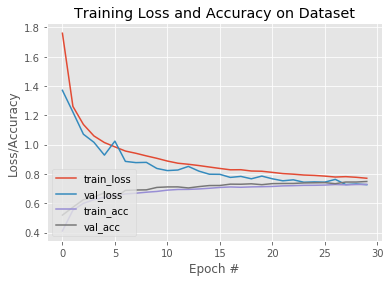

In [5]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
#matplotlib.use("Agg") ## so that we can save our training plots as image files.
%matplotlib inline

# import the necessary packages
from sklearn.metrics import classification_report
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
 
#plot_fname = 'keras_learning_curve.png'

# initialize the initial learning rate, total number of epochs to
# train for, and batch size
INIT_LR = 0.01
EPOCHS = 30 # Each epoch takes 450s using CPU and only ~30s using GPU (Runtime->Change runtime tyme->EnableGPU)
BS = 32
 
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model = MiniVGGNetKeras.build(width=32, height=32, depth=3,
	classes=len(labelNames))
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# Visualize the network structure (image is cropped unfortunately...)
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

# train the network
print("[INFO] training network for {0:d} epochs...".format(EPOCHS))
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=BS, epochs=EPOCHS, verbose=1)
 
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(plot_fname)
plt.show()


# Test the trained VGG16 network on the test data

In [0]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),  ## classification_report() outputs the precision etc for each class
	predictions.argmax(axis=1), target_names=labelNames))


# Try the pre-trained VGG16 model from Keras

In [5]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2  # OpenCV. Useful for loading/manipulating/saving images
import numpy as np

print('Shape of original test data:', testX.shape)
# Load the built-in pre-trained VGG16 model and apply it to the test set
pretrained_model = VGG16(weights='imagenet', include_top=True)

# Need to resize the test images from 32x32 to 244x244 to work with the pre-trained VGG16 network
def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 244, 244, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(244, 244), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

# resize test data
x_test_resized = resize_data(testX)
print('Shape of resized test data:', x_test_resized.shape)

# evaluate the network
## Getting an error; giving up. If anyone can solve this, please email me and I'll update the example!
print("[INFO] evaluating network...")
predictions = pretrained_model.predict(x_test_resized, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))
 

(10000, 32, 32, 3)






(10000, 244, 244, 3)
[INFO] evaluating network...


ValueError: ignored